In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# <span style="color:red">KNN para imagenes derivadas</span>


In [2]:
path_classes = "/home/franklinsierra/Documentos/Biomedica/Experimentos/notebooks/mix_der_img/"
classes_names = os.listdir(path_classes)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['hiperplasNbi', 'adenomaWl', 'serratedWl', 'serratedNbi', 'hiperplasWl', 'adenomaNbi']
class:  hiperplasNbi total  21
class:  adenomaWl total  40
class:  serratedWl total  15
class:  serratedNbi total  15
class:  hiperplasWl total  21
class:  adenomaNbi total  40


In [3]:
X = []
y = []
resize_value = 100

for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, "y_valor: ", (i+1), "total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        X.append(flatt_img)
        y.append(i+1)
X = np.r_[X]        
y = np.r_[y]

1 clase:  hiperplasNbi y_valor:  1 total:  21
2 clase:  adenomaWl y_valor:  2 total:  40
3 clase:  serratedWl y_valor:  3 total:  15
4 clase:  serratedNbi y_valor:  4 total:  15
5 clase:  hiperplasWl y_valor:  5 total:  21
6 clase:  adenomaNbi y_valor:  6 total:  40


### Normalizando

In [4]:
X_norm = preprocessing.normalize(X)

In [5]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=test_size)
print (y_test)

[5 6 5 2 1 6 6 1 5 3 2 5 4 4 2 2 3 5 3 6 1 1 3 3 2 6 6 2 2 6 2]


In [6]:
max_val = -1
k_neighbors = [1,2,4,6,8,10,20,30,40,80,100]
for j in list(k_neighbors):
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(X_train, y_train)
        accuracy = neigh.score(X_test, y_test)
        print("K vecino: ", j, "accuracy: ", neigh.score(X_test, y_test))
        if accuracy > max_val:
            max_val = accuracy
            k_neighbor = j
            
neigh = KNeighborsClassifier(n_neighbors=k_neighbor)
neigh.fit(X_train, y_train)
accuracy = neigh.score(X_test, y_test)
print("El k que da mejor resultado es: ", k_neighbor)
print("accuracy: ", accuracy)        

K vecino:  1 accuracy:  0.0967741935483871
K vecino:  2 accuracy:  0.22580645161290322
K vecino:  4 accuracy:  0.25806451612903225
K vecino:  6 accuracy:  0.3225806451612903
K vecino:  8 accuracy:  0.2903225806451613
K vecino:  10 accuracy:  0.22580645161290322
K vecino:  20 accuracy:  0.16129032258064516
K vecino:  30 accuracy:  0.12903225806451613
K vecino:  40 accuracy:  0.12903225806451613
K vecino:  80 accuracy:  0.2903225806451613
K vecino:  100 accuracy:  0.1935483870967742
El k que da mejor resultado es:  6
accuracy:  0.3225806451612903


In [7]:
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [8]:
score = np.mean(cross_val_score(neigh, X_norm, y, scoring = "accuracy", cv = cv, n_jobs=1))
score

0.2504166666666667

In [9]:
from sklearn.metrics import confusion_matrix

predicciones_train = neigh.predict(X_train)
predicciones_test = neigh.predict(X_test)

cm_train = confusion_matrix(predicciones_train, y_train)
cm_test = confusion_matrix(predicciones_test, y_test)
print("Confusion matrix train")
print(cm_train)
print("=========================")
print("Confusion matrix test")
print(cm_test)

Confusion matrix train
[[12  1  1  1  3  7]
 [ 1 26  3  3  6 17]
 [ 0  1  3  5  0  1]
 [ 0  1  3  2  0  2]
 [ 2  1  0  0  6  0]
 [ 2  2  0  2  1  6]]
Confusion matrix test
[[2 1 0 0 4 1]
 [1 4 3 2 1 2]
 [0 1 1 0 0 0]
 [0 0 1 0 0 1]
 [1 1 0 0 0 0]
 [0 1 0 0 0 3]]


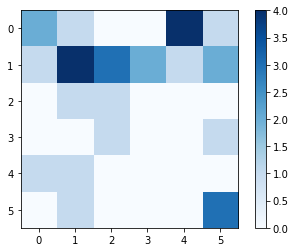

In [10]:
plt.imshow(cm_test, interpolation="nearest", cmap = plt.cm.Blues)
plt.colorbar()
plt.show()

### Standardization version

In [11]:
X_cent = preprocessing.scale(X)

In [12]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_cent,y,test_size=test_size)
print (y_test)

[2 2 6 6 3 2 1 6 2 3 2 1 4 3 4 2 6 2 1 4 6 5 6 2 2 6 1 1 1 2 6]


In [13]:
cv2 = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [14]:
score2 = np.mean(cross_val_score(neigh, X_cent, y, scoring = "accuracy", cv = cv2, n_jobs=1))
score2

0.22416666666666668

## <span style="color:red">LOOCV</span>

### Normalized

In [15]:
cv3 = KFold(n_splits = X_norm.shape[0], shuffle = True, random_state = 1)

In [16]:
score3 = np.mean(cross_val_score(neigh, X_norm, y, scoring = "accuracy", cv = cv2, n_jobs=1))
score3

0.2504166666666667

### Standardization 

In [18]:
cv4 = KFold(n_splits = X_cent.shape[0], shuffle = True, random_state = 1)

In [19]:
score4 = np.mean(cross_val_score(neigh, X_cent, y, scoring = "accuracy", cv = cv4, n_jobs=1))
score4

0.19736842105263158